In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("C:/Users/ADMIN/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt", sep=";")
df.head()




C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6148\2842091611.py:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/ADMIN/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt", sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Time'] = pd.to_timedelta(df['Time'])


# Add a 'Datetime' column that combines Date and Time
df['Datetime'] = df['Date'] + df['Time']
df.drop(columns=['Date', 'Time'], inplace=True)



In [8]:
df.replace("?", pd.NA, inplace=True)

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')


df.fillna(df.mean(), inplace=True)

In [9]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,NaN


<Axes: ylabel='Global_active_power'>

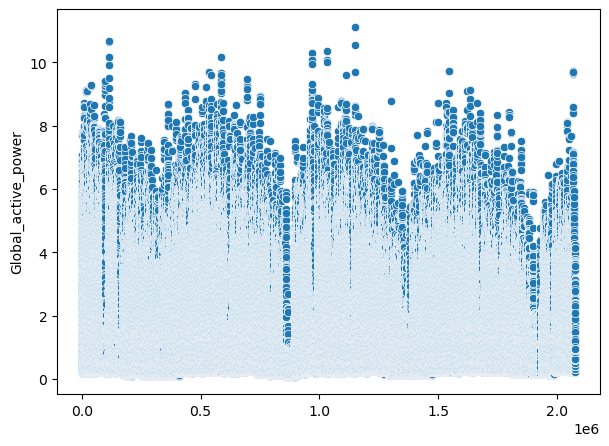

In [12]:
# Identifying the outliers in the target variable
plt.figure(figsize = (7, 5))
sns.scatterplot(df['Global_active_power'])

<Figure size 500x300 with 0 Axes>

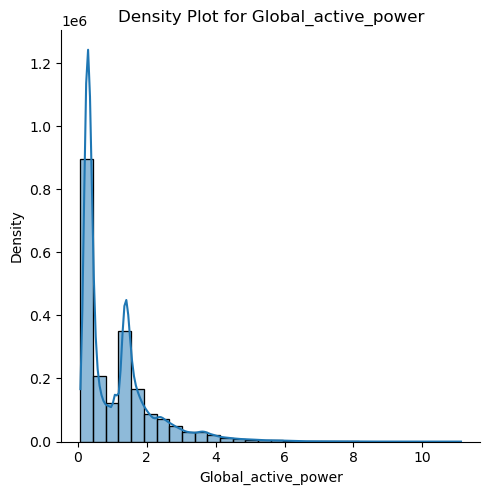

In [13]:
# Identifying the outliers in the target variable
plt.figure(figsize = (5, 3))
sns.displot(df['Global_active_power'], bins = 30, kde = True)
plt.title('Density Plot for Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Density')
plt.show()

In [14]:
# Removing the outliers
df = df[df['Global_active_power'] < 6]

<Figure size 500x300 with 0 Axes>

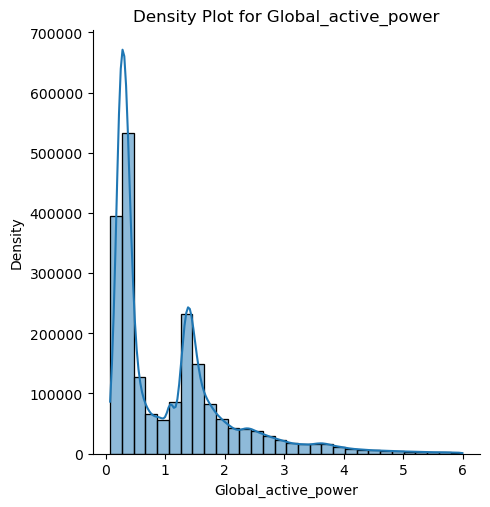

In [15]:
# Checking the outliers in the target variable
plt.figure(figsize = (5, 3))
sns.displot(df['Global_active_power'], bins = 30, kde = True)
plt.title('Density Plot for Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Density')
plt.show()

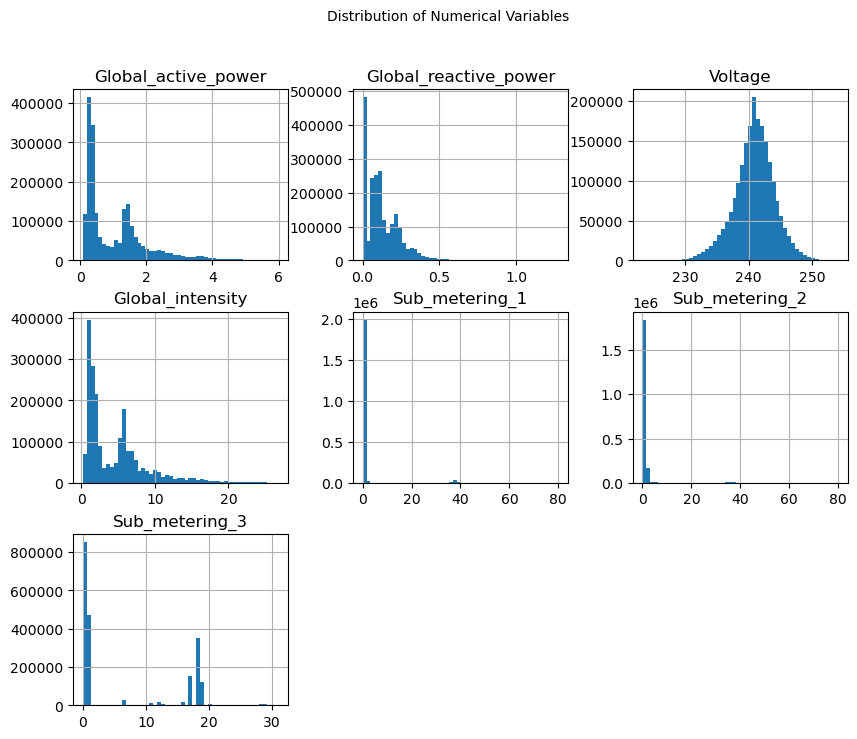

In [16]:
# Plot histograms for numerical columns
df=df.drop('Datetime',axis=1)
df.hist(bins=50, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables', fontsize=10)
plt.show()

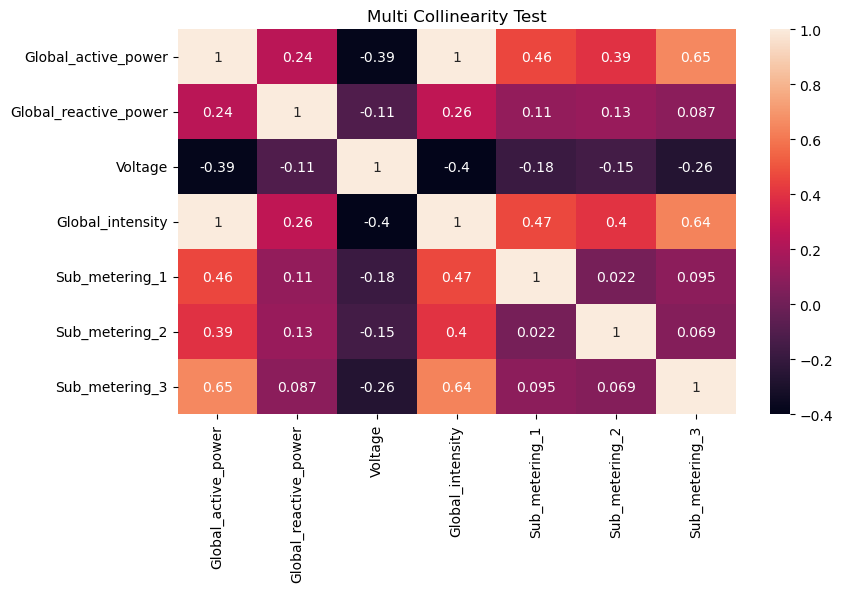

In [17]:
# MultiCollinearity Test (Pearson's Correlation Coefficient)
plt.figure(figsize = (9, 5))
sns.heatmap(df.corr(), annot = True)
plt.title('Multi Collinearity Test')
plt.show()

In [ ]:
#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [22]:
    # Seperating the input features and target variable
    X = df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
    y = df['Global_active_power']

    # Performing train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [23]:
# Initializing the ML Model
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Taking the predictions from the model
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [25]:
# Evaluating the model
from sklearn import metrics
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))

Training RMSE : 0.2
Training MAE : 0.16
Training R2 Score : 1.0

Testing RMSE : 0.2
Testing MAE : 0.16
Testing R2 Score : 1.0


In [26]:
# Ridge with low alpha 
rr = Ridge(alpha = 0.01)

# Fitting the model
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [27]:
# Ridge with high alpha 
rr100 = Ridge(alpha = 100)

# Fitting the model
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [28]:
# Training and Testing Score (Linear Regression)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print('Training Score :', np.round(train_score, 2))
print('Testing Score :', np.round(test_score, 2))

Training Score : 1.0
Testing Score : 1.0


In [29]:
# Training and Testing Score (Ridge Regression with High Alpha)
rr100_train_score = rr100.score(X_train, y_train)
rr100_test_score = rr100.score(X_test, y_test)
print('Training Score :', np.round(rr100_train_score, 2))
print('Testing Score :', np.round(rr100_test_score, 2))

Training Score : 1.0
Testing Score : 1.0


In [30]:
# Training and Testing Score (Ridge Regression with Low Alpha)
rr_train_score = rr.score(X_train, y_train)
rr_test_score = rr.score(X_test, y_test)
print('Training Score :', np.round(rr_train_score, 2))
print('Testing Score :', np.round(rr_test_score, 2))

Training Score : 1.0
Testing Score : 1.0


In [33]:
# Lasso 

In [31]:
# lasso with low alpha 
lasso = Lasso(alpha = 0.01)

# Fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [32]:
# lasso with high alpha 
lasso5 = Lasso(alpha = 5)

# Fitting the model
lasso5.fit(X_train, y_train)

Lasso(alpha=5)

In [33]:
# Training and Testing Score 
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
coeff_used = np.sum(lr.coef_ != 0)
print('Training Score :', np.round(train_score, 2))
print('Testing Score :', np.round(test_score, 2))
print('Number of coefficients used :', coeff_used)

Training Score : 1.0
Testing Score : 1.0
Number of coefficients used : 6


In [34]:
# Training and Testing Score (Lasso with Low Alpha)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
lasso_coeff_used = np.sum(lasso.coef_ != 0)
print('Training Score :', np.round(lasso_train_score, 2))
print('Testing Score :', np.round(lasso_test_score, 2))
print('Number of coefficients used :', lasso_coeff_used)

Training Score : 1.0
Testing Score : 1.0
Number of coefficients used : 3


In [35]:
# Training and Testing Score (Lasso with High Alpha)
lasso5_train_score = lasso5.score(X_train, y_train)
lasso5_test_score = lasso5.score(X_test, y_test)
lasso5_coeff_used = np.sum(lasso5.coef_ != 0)
print('Training Score :', np.round(lasso5_train_score, 2))
print('Testing Score :', np.round(lasso5_test_score, 2))
print('Number of coefficients used :', lasso5_coeff_used)

Training Score : 0.07
Testing Score : 0.07
Number of coefficients used : 1


In [40]:
'''
The above model is optimal model
'''

'\nThe above model is optimal model\n'

In [36]:
# Creating the DecisionTreeRegressor()
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

# Fitting the model 
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
# Taking predictions from the model
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [ ]:
# Evaluating the model
from sklearn import metrics
print('Training RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_train, y_train_pred)), 2))
print('Training MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred)), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

print('\nTesting RMSE :', np.round(np.sqrt(metrics.root_mean_squared_error(y_test, y_pred)), 2))
print('Testing MAE :', np.round(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)), 2))
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))

Training RMSE : 0.1
Training MAE : 0.06
Training R2 Score : 1.0

Testing RMSE : 0.21
Testing MAE : 0.15
Testing R2 Score : 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Creating the model
rfr = RandomForestRegressor(n_estimators=100,random_state=5)

# Fitting the model
model.fit(X_train, y_train)